In [3]:
#Question 1 
#Occupations
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3. Assign it to a variable called users
users = pd.read_csv(url, sep='|')

# Step 4. Discover what is the mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()

# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
male_ratio = users[users['gender']=='M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio = male_ratio.sort_values(ascending=False)

# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7. For each combination of occupation and sex, calculate the mean age
mean_age_sex = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8. For each occupation present the percentage of women and men
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

print("Mean Age per Occupation:\n", mean_age)
print("\nMale Ratio per Occupation:\n", male_ratio)
print("\nMin and Max Age per Occupation:\n", min_max_age)
print("\nMean Age per Occupation and Sex:\n", mean_age_sex)
print("\nPercentage of Women and Men per Occupation:\n", occup_gender)

Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0

In [4]:
#Question 2
#Euro Teams
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12['Goals']

# Step 5. How many team participated in the Euro2012?
num_teams = euro12['Team'].nunique()

# Step 6. What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()

print("Goals:\n", goals)
print("\nNumber of Teams:", num_teams)
print("\nNumber of Columns:", num_columns)
print("\nDiscipline:\n", discipline)
print("\nMean Yellow Cards per Team:", mean_yellow_cards)

# Step 10. Filter teams that scored more than 6 goals
teams_over_6_goals = euro12[euro12['Goals'] > 6]

# Step 11. Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12. Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]

# Step 13. Select all columns except the last 3
all_but_last_3 = euro12.iloc[:, :-3]

# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Teams that scored more than 6 goals:\n", teams_over_6_goals)
print("\nTeams that start with G:\n", teams_starting_with_G)
print("\nFirst 7 columns:\n", first_7_columns)
print("\nAll columns except the last 3:\n", all_but_last_3)
print("\nShooting Accuracy from England, Italy and Russia:\n", shooting_accuracy)


Goals:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of Teams: 16

Number of Columns: 35

Discipline:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark      

In [5]:
#Question 3
#Housing
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Create 3 different Series, each of length 100
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

# Step 3. Create a DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1)

# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()

# Step 6. Ops it seems it is going only until index 99. Is it true?
print(bigcolumn)

# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)

        0
0       4
1       2
2       2
3       1
4       3
..    ...
95  29210
96  15342
97  20439
98  19114
99  18466

[300 rows x 1 columns]
         0
0        4
1        2
2        2
3        1
4        3
..     ...
295  29210
296  15342
297  20439
298  19114
299  18466

[300 rows x 1 columns]


In [18]:
#Question 4
#Wind Statistics
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

# Step 2: Import the dataset from this address
data_url = "D:\Download\wind.txt"
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# Step 4: Year 2061? Do we really have data from this year? Create function to fix it and apply it.
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

# Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
print(data.isnull().sum())

# Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
print(data.shape[0] - data.isnull().sum())

# Step 7: Compute how many non-missing values there are in total.
print(data.mean().mean())

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
loc_stats = pd.DataFrame()

loc_stats['min'] = data.min() # min
loc_stats['max'] = data.max() # max 
loc_stats['mean'] = data.mean() # mean
loc_stats['std'] = data.std() # standard deviations

# Step 9: Create DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

# Step 10: Create DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
print(data.loc[data.index.month == 1].mean())

# Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
print(data.resample('A').mean())

# Step 12: Downsample the record to a yearly frequency for each location.
print(data.resample('M').mean())

# Step 13: Downsample the record to a monthly frequency for each location.
print(data.resample('W').mean())

# Step 14: Downsample the record to a weekly frequency for each location.
weekly = data.resample('W').mean().apply(lambda x: [x.min(), x.max(), x.mean(), x.std()])

# Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
print(weekly.loc[weekly.index[1:53]])

C:\Users\Avnis\AppData\Local\Temp\ipykernel_7696\1732912543.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]])


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64
10.227982360836938
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.4

In [7]:
#Question 5
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = '\t')

# Step 3. Assign it to a variable called chipo.
# Already done in step 2

# Step 4. See the first 10 entries
print(chipo.head(10))

# Step 5. What is the number of observations in the dataset?
print(chipo.shape[0])

# Step 6. What is the number of columns in the dataset?
print(chipo.shape[1])

# Step 7. Print the name of all the columns.
print(chipo.columns)

# Step 8. How is the dataset indexed?
print(chipo.index)

# Step 9. Which was the most-ordered item? 
most_ordered = chipo['item_name'].value_counts().idxmax()
print(most_ordered)

# Step 10. For the most-ordered item, how many items were ordered?
most_ordered_count = chipo['item_name'].value_counts().max()
print(most_ordered_count)

# Step 11. What was the most ordered item in the choice_description column?
most_ordered_desc = chipo['choice_description'].value_counts().idxmax()
print(most_ordered_desc)

# Step 12. How many items were orderd in total?
total_items = chipo['quantity'].sum()
print(total_items)

# Step 13. Turn the item price into a float and Check the item price type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo['item_price'].dtype)

# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity']* chipo['item_price']).sum()
print(revenue)

# Step 15. How many orders were made in the period?
orders = chipo['order_id'].value_counts().count()
print(orders)

# Step 16. What is the average revenue amount per order?
average_revenue = revenue/orders
print(average_revenue)

# Step 17. How many different items are sold?
diff_items = chipo['item_name'].value_counts().count()
print(diff_items)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

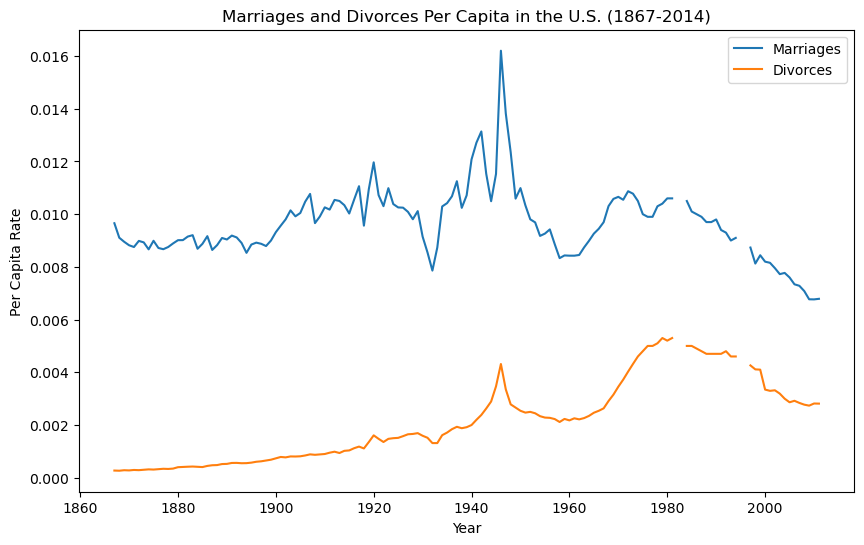

In [20]:
#Question 6
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"D:\Download\us-marriages-divorces-1867-2014.csv")

# Calculate per capita rates
data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.legend()

# Show the plot
plt.show()

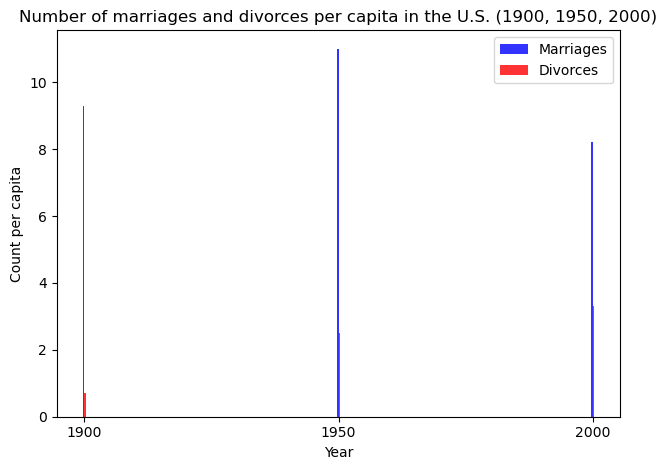

In [17]:
#Question 7
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"D:\Download\us-marriages-divorces-1867-2014.csv")

# Filter the data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Create the bar chart
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots()

bar1 = plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], bar_width, alpha=opacity, color='b', label='Marriages')
bar2 = plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], bar_width, alpha=opacity, color='r', label='Divorces')

plt.xlabel('Year')
plt.ylabel('Count per capita')
plt.title('Number of marriages and divorces per capita in the U.S. (1900, 1950, 2000)')
plt.xticks(filtered_data['Year'])
plt.legend()

plt.tight_layout()
plt.show()

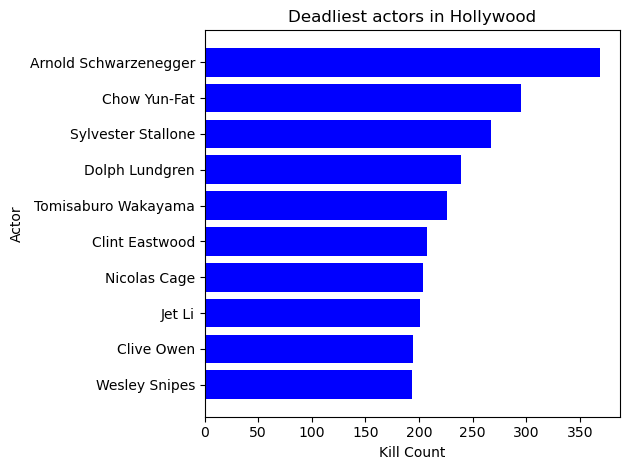

In [22]:
#Question 8
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"D:\Download\actor_kill_counts.csv")

# Sort the data by 'Count'
data_sorted = data.sort_values(by='Count')

# Create the bar chart
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='blue')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest actors in Hollywood')
plt.tight_layout()
plt.show()

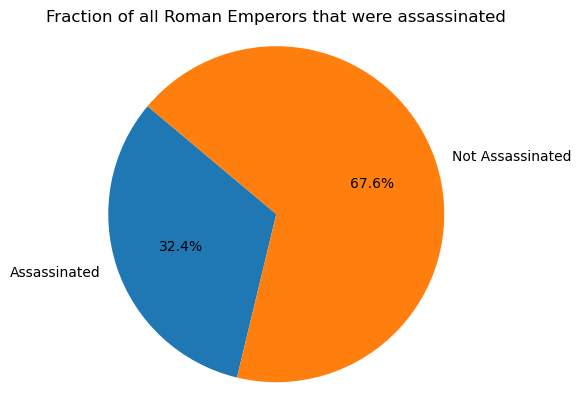

In [23]:
#Question 9
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"D:\Download\roman-emperor-reigns.csv")

# Calculate the fraction of all Roman Emperors that were assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
fraction_assassinated = len(assassinated_emperors) / total_emperors

# Create the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of all Roman Emperors that were assassinated')
plt.show()

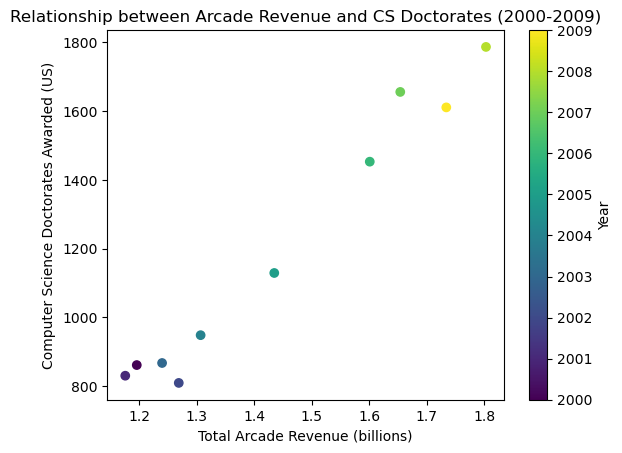

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"D:\Download\arcade-revenue-vs-cs-doctorates.csv")

# Create the scatter plot
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'], cmap='viridis')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')

plt.show()
